# <span style="color:green"> Laboratorio di Simulazione Numerica (NSL) </span>
## <span style="color:blue">  Esercitazione 7</span>

## Simulazione Monte Carlo di un fluido con potenziale di interazione Lennard-Jones(LJ) nell'Ensemble Canonico NVT

### Obiettivo


In questa settima esercitazione viene discussa la simulazione di un fluido semplice ($N=108$ particelle in un box cubico con condizioni periodiche al contorno **Pbc**) con un potenziale di interazione del tipo **Lennard-Jones**, analogamente alla *esercitazione 4*, rispettivamente nelle tre fasi termodinamiche solido, liquido e gas nell'**ensemble canonico** a fissato numero di particelle $N$, volume del box $V$ e temperatura $T$ (**NVT**) con una simulazione **Monte Carlo**, quindi con un algoritmo di **Metropolis** che costruisce e simula una catena di Markov adeguata a realizzare, asintoticamente, il campionamento del **peso statistico di Boltzmann**, a differenza dell'ensemble microcanonico **NVE** che, nella esercitazione 4, veniva simulato con con un codice di **dinamica molecolare** producendo nuove configurazioni integrando e risolvendo le equazioni del moto ad energia costante.


### Esercizio 7.01-7.02

In questa prima fase viene modificato il codice MDNVE_MCNVT affinchè sia in grado di ricavare valori istantanei di **energia potenziale per particella** $\frac{U}{N}$ e di **pressione** $P$ opportunamente modificati tramite le **correzioni di coda** in fase di stampa su file. 
Questo provvedimento va a correggere eventuali sottostime o sovrastime delle due osservabili in questione causate dal cut-off sferico del potenziale. In particolare le correzioni sulle medie finali del poteziale e del viriale sono rispettivamente le seguenti:
$$
\frac{\langle V^*_{LJ} \rangle_{tail}}{N} = 8\pi\rho^*\left[ \frac{1}{9}\left(\frac{1}{r^*_{cut}}\right)^9 - \frac{1}{3}\left(\frac{1}{r^*_{cut}}\right)^3 \right]
$$
$$
\frac{\langle W^*_{LJ} \rangle_{tail}}{3N} = 32\pi\rho^*\left[ \frac{1}{9}\left(\frac{1}{r^*_{cut}}\right)^9 - \frac{1}{6}\left(\frac{1}{r^*_{cut}}\right)^3 \right]
$$

Le condizioni termodinamiche investigate sono le seguenti (analoghe all'*esercitazione 4*) con il simbolo $\star$ che indica che le grandezze sono espresse in unità ridotte di LJ:

- fase solida: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- fase liquida: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- fase gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

Nel file **input.in** vengono sovrascritti i file di input delle tre rispettive fasi (*input.(pahse)*) che contengono il set di parametri che identificano le tre fasi sopra elencate, il numero di particelle costituenti il sistema $N=108$, la variabile $iEQ$ per indicare il tipo di misura da eseguire (0=misura vera 1=equilibrazione), il numero di blocchi in cui è divisa la simulazione, gli steps MC per ciascun blocco e l'ampiezza *delta*. La configurazione di partenza è quella di un reticolo cristallino fcc (*config.fcc*). La lettura ( mediante la routine *Input()*) di questo file costituisce l'inizializazione del sistema e prepara il programma ad eseguire la simulazione.

L'ultimo parametro di input, sopra citato, indica l'ampiezza della mossa proposta dall'algoritmo di Metropolis assumendo di usare una probabilità transizione tentativo $T(\vec {x_{new}},\vec{x_{old}})$ uniforme su ciascuna delle tre coordinate che individuano la posizione di un singolo grado di libertà del sistema, inoltre, il suo valore deve essere scelto in modo tale che il **tasso di accettazione** soddisfi la regola empirica del $50$%. La scelta per la simulazione delle tre fasi termodinamiche è qui di seguito riportata:

- fase solida: $ delta^\star = 0.12 $ 
- fase liquida: $ delta^\star = 0.2 $ 
- fase gassosa: $ delta^\star = 5.0 $

Si osservi che per la fase gassosa il parametro della mossa è molto più elevato delle altre fasi e, nonostante questo, riesce a soddisfare solo una probabilità di accettazione  $A(\vec {x_{new}},\vec{x_{old}}) = 62$%. Questo comportamento è riconducibile alla natura della fase gassosa, essa infatti rappresenta un sistema molto diluito dove i gradi di libertà si trovano molto distanti tra di loro e l'interazione tra di essi è molto meno significativa. La mossa tentativo, pur provando a modificare la configurazione della singola particella non porta ad un significativo cambiamento della sua energia di interazione (routine *Bolzmann()* nel codice) con le altre particelle all'interno del box di simulazione, di conseguenza la probabilità di accettazione, per come è definita, rimane piuttosto elevata. Inoltre si ricordi che non è possibile salire con l'ampiezza della mossa oltre metà della taglia del box di simulazione ($L_{gas}^\star \simeq 13$) perchè a quel punto entrerebbero in gioco le Pbc. 


La fase di equilibrazione viene effettuata con $N_{steps}=2000$  MC verificando che i valori istantanei di energia potenziale e pressione (stampati in  *MC/(phase)/equilibration/
(phase)0_output_(osservabile).dat*) si stabilizzino nel corso della breve simulazione. Le configurazioni finali ottenute (caricate in *MC/(phase)/equilibration/
(phase)_config.out*) vengono salvate in modo da potere essere riutilizzate per i futuri test e simulazioni partendo dalle configurazioni in cui il sistema è **equilibrato**.

L'indice 0 o 1 nei file di output sta ad indicare se si tratta della prima misura o di una misura di restart (restart=0 o restart=0 in *input.in*) dall'ultima configurazione ottenuta. 

Qui di seguito vengono riporati i grafici che mostrano l'equilibrazione del sistema, ossia i valori delle due grandezze in esame in funzionde dei time steps MC di equilibrazione.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

####FUNCTIONS
def load_eq_data(Y_file ) : 
    X, Y = np.loadtxt(Y_file, usecols = (0,1) ,unpack=True)
    return X, Y
   
    
def plot_eq_data(ax, x, y, observable, phase , delta,  col) :
    ax.plot(x, y , color=col)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.set_xlabel('i step', fontsize=25)
    ax.set_ylabel(f"{observable}", fontsize=25)
    ax.set_title(f"{phase} phase, N particles = {Npart} , delta = {delta}", fontsize=30)
    ax.grid(True)

    
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

colors=['b' , 'g' , 'r' , 'm' , 'y']


path = ["MDNVE_MCNVT/DATA/MC/" , "MDNVE_MCNVT/DATA/MD/"]
Obs=["U/N", "P" , "g(r)"]
phase=["liquid" , "solid" , "gas"]
names=["_output_epot.dat" , "_output_press.dat" , "_output_gave.dat" ]
delta=["0.2" , "0.12" , "6.0"]
Nobs=len(Obs)
Npart=108 #number of particles

In [3]:
filename = np.empty(len(phase) , dtype = object)

for i in range(len(phase)):
    filename[i] = path[0] + phase[i] + "/equilibration/" + phase[i]+ "0" + names[0]

Nblocks_vec= np.empty(len(phase), dtype=object) #vector with i bloxk step index
Eq_vec= np.empty(len(phase), dtype=object) #value of the observable per block


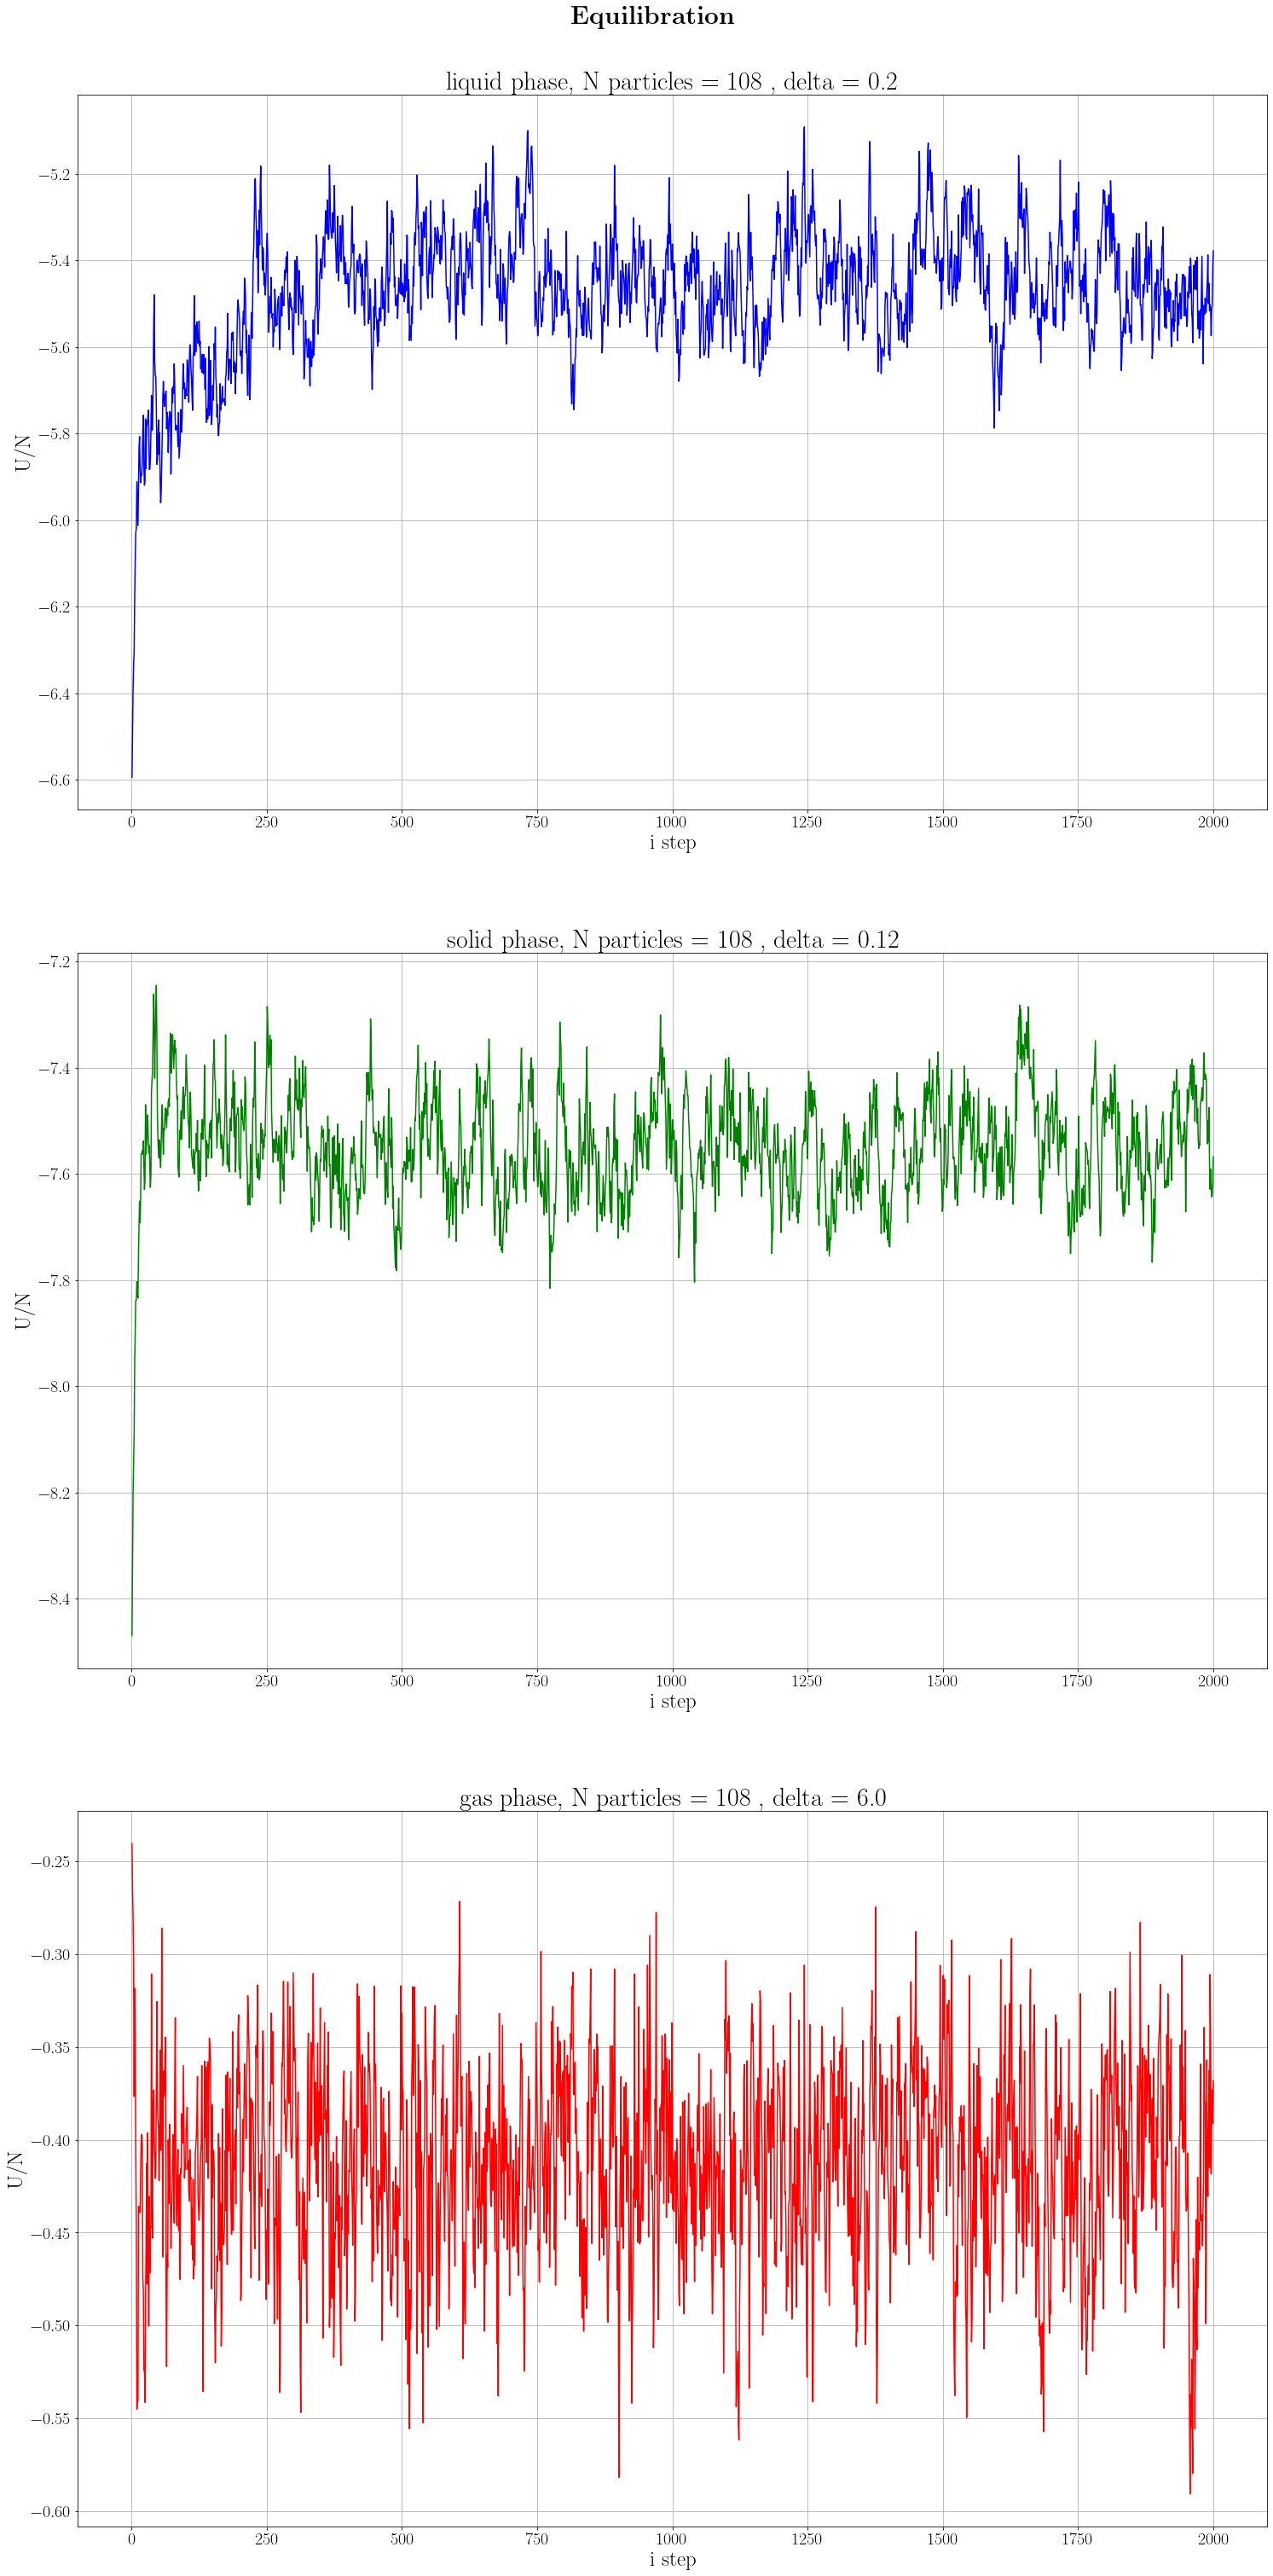

In [8]:
#equilibration plots
fig, axes = plt.subplots(len(phase), figsize=(25, 48))
plt.suptitle(r"\textbf{Equilibration}", fontsize='30')
fig.subplots_adjust(top=0.95)

for i in range(len(phase)):
    Nblocks_vec[i], Eq_vec[i] = load_eq_data(filename[i])
    plot_eq_data(axes[i], Nblocks_vec[i], Eq_vec[i], Obs[0],phase[i], delta[i], colors[i])

- Dai plots rappresentati si osserva che il sistema raggiunge l'equilibrio in poche centinaia di steps MC per tutte e tre le fasi simulate.

Dal sistema in equilibrio (restart=1 in *input.in*) viene eseguita la stampa di $M=500000$ valori istantanei (*MC/(phase)/equilibration/
(phase)1_output_(osservabile).dat*) che vengono usati per effettuare due differenti analisi sull'incertezza statistica nei calcoli MC,  che consentono di stimare , in ultima istanza, di quale lunghezza dovranno essere i blocchi nella simulazione effettiva affinchè i risultati finali possano ritenersi **statisticamente** attendibili e precisi.

1) **Analisi della funzione di autocorrelazione ($AC_{[grandezza]}(t)$)**

Nel caso di una catena di Markov MC si può calcolare la funzione di autocorrelazione solo su un insieme finito di punti o meglio di step MC discreti. In questo caso la sua espressione per una qualsiasi proprietà di interesse g del sistema è la seguente:
$$
\chi(t) = \frac{\frac{1}{t_{max}-t} \sum_{t' = 0}^{t_{max}-t} g(t')g(t'+t) - \frac{1}{t_{max}-t} \sum_{t' = 0}^{t_{max}-t} g(t') \times \frac{1}{t_{max}-t} \sum_{t' = 0}^{t_{max}-t} g(t'+t)}{\frac{1}{t_{max}} \sum_{t' = 0}^{t_{max}} g^2(t') - {\sum_{t' = 0}^{t_{max}} g(t') }^2}
$$
dove $t_{max}$ indica il numero totale di steps MC.

Essa ci dà un'informazione **quantitativa** di quanto le configurazioni prodotte in successione dall'algoritmo di Metropolis siano correlate tra di loro in funzione del numero di steps MC che le separano.

CI si aspetta che per misure di valori di una determinata grandezza associate a configurazioni separate da un numero molto basso di steps temporali la funzione di correlazione presenti dei valori positivi ed elevati, in quanto i valori della variabile in esame sono molto simili, al contrario, su scale di tempo maggiori, le misure dovrebbero essere, con buone probabilità, quasi completamente scorrelate e mostrare un valore della $AC_{[g]}(t)$ praticamente nullo.

Il suo andamento, che dovrebbe cadere (approssimativamente) come un **esponenziale** ($\chi(t) \simeq e^{\frac{-t}{t_{corr}}}$) su scale di tempi elevate, fornisce una stima del **tempo di correlazione** ($t_{corr}$)  (ossia il tempo scala dell'esponenziale) che rappresenta il tempo che impiega il sistema per generare configurazioni significativamente diverse da quella iniziale. Tale grandezza consente di stimare quanto devono essere lunghi i blocchi della simulazione affinchè il numero di steps per blocco sia sufficientemente grande da evitare configurazioni troppo correlate. Ad una distanza di un $t_{corr}$, però, i campioni osservati mostrano ancora un significativo valore di $AC_{[g]}(t)$.

Quindi i time steps necessari affinchè due campioni possano considerarsi **statisticamente indipendenti** devono essere sigificativamente maggiori della stima di $t_{corr}$ per produrre configurazioni scorrelate. Per convenzione si ritengono sufiicienti $2 t_{corr}$.  Per una simulazione di $t_{max}$ steps MC il numero di campionamenti indipendeti utile per calcolare le medie di ensemble è pari a $N \simeq \frac{t_{max}}{2t_{corr}}$.

Questo calcolo è stato implementato nella prossime celle di tipo code per entrambe le grandezze $\frac{U}{N}$ e $P$ per tutte e tre le fasi.
La prima delle due celle contiene la funzione di autocorrelazione ottenuta tramite somme, come indicata sopra. A causa dell'eccessivo tempo di calcolo richiesto dall'utilizzo di questa funzione, per la stima di $AC_{[g]}(t)$  viene utilizzata una funzione fornita dalla libreria *statsmodels.api* che sfrutta invece l'inversione della Trasformata di Fourier e risulta molto più efficiente.

In [218]:
#my autocorrelation function
#not used since it take a long time to compute

def autocorrelation(x,t_max):
    x_ave=0
    x2_ave=0
    for t in range(t_max):
        x_ave+=x[t]
        x2_ave+=x[t]*x[t]        
    x_ave=x_ave/(t_max)
    x2_ave=x2_ave/(t_max)
    var=x2_ave-x_ave*x_ave
    ac=np.zeros(t_max) 
    for t in range(t_max):
        sum_1=0
        sum_2=0 
        sum_3=0
        for j in range(0,t_max-t):
            sum_1+=x[j]*x[j+t]
            sum_2+=x[j+t]
            sum_3+=x[j]
        ac[t]=((sum_1/(t_max-t))-(sum_3/(t_max-t))*(sum_2/(t_max-t)))/(var)
    
    return ac

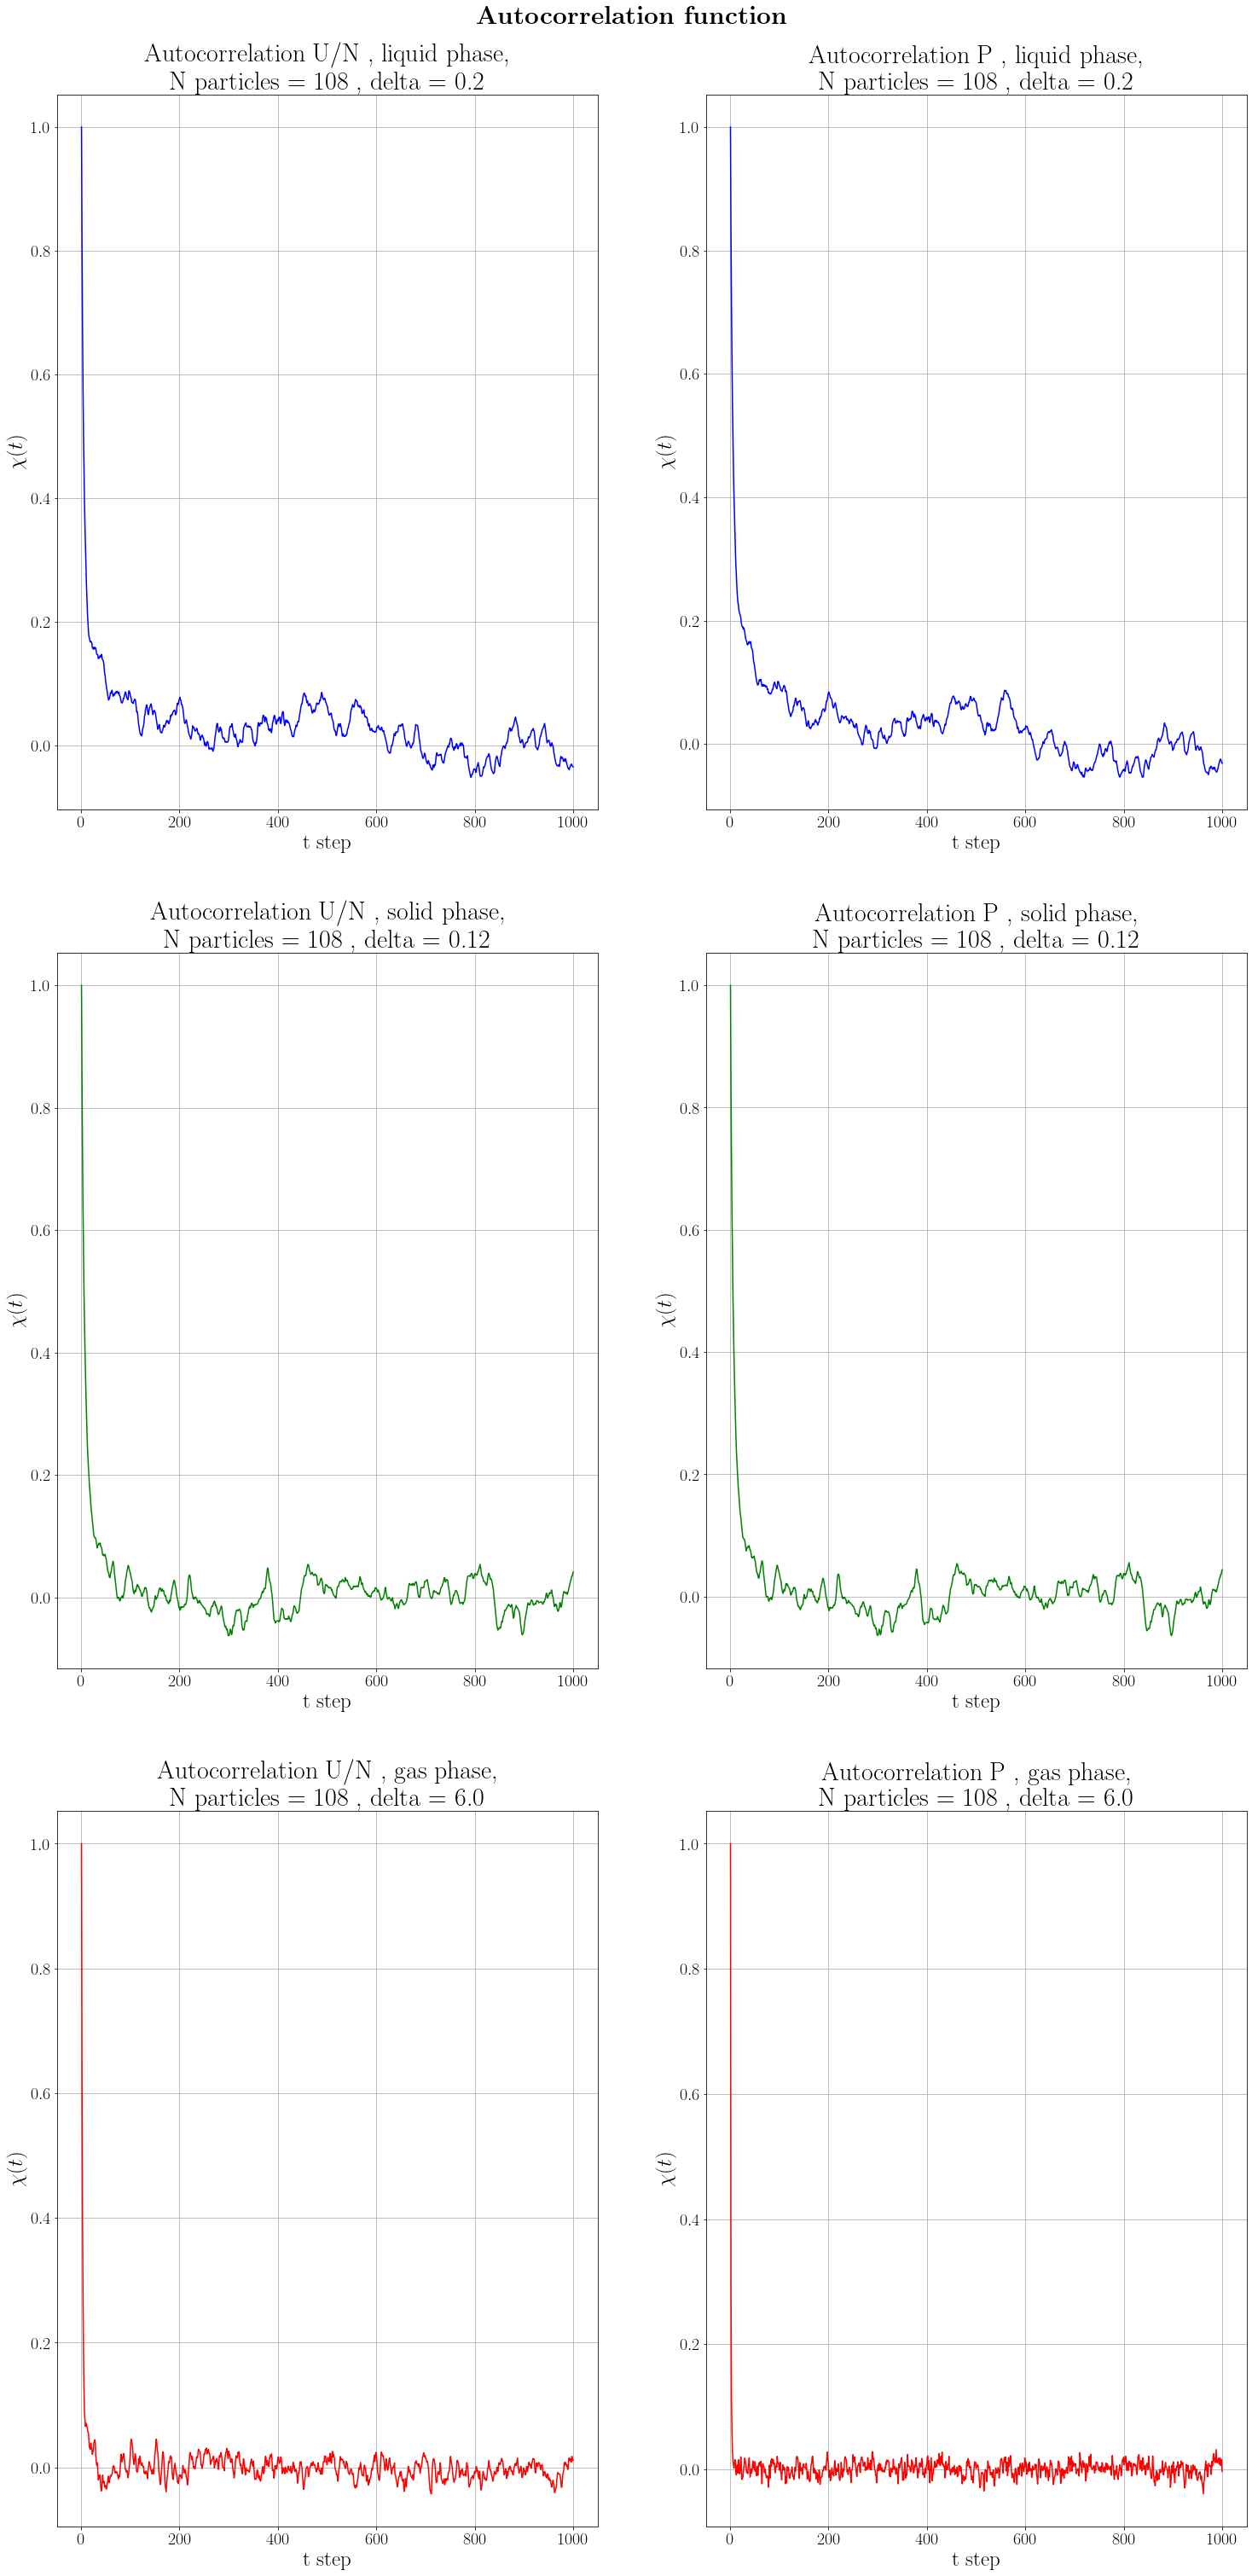

In [9]:
import statsmodels.api as sm

def load_ac_data(Y_file , maxrow) : 
    Y = np.loadtxt(Y_file, usecols = 1 ,unpack=True , max_rows=maxrow)
    return Y

def plot_ac_data(ax, x, y, observable, phase , delta,  col) :
    ax.plot(x, y , color=col)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.set_xlabel('t step', fontsize=25)
    ax.set_ylabel(f"$\chi(t)$", fontsize=25)
    ax.set_title(f" Autocorrelation {observable} , {phase} phase,\n N particles = {Npart} , delta = {delta}", fontsize=30)
    ax.grid(True)

filename = np.empty((len(phase) ,2 ), dtype = object)
Y1_vec= np.empty((len(phase) ,2 ), dtype=object) #value of the observable 
Ac_vec= np.empty((len(phase) ,2 ), dtype=object) #autocorrelation for each phase

for i in range(len(phase)):
    for j in range(2):
        filename[i][j] = path[0] + phase[i] + "/equilibration/" + phase[i]+ "1" + names[j]
        
#autocorrelation plots
fig, axes = plt.subplots(len(phase), 2 , figsize=(25, 48))
plt.suptitle(r"\textbf{Autocorrelation function}", fontsize='30')
fig.subplots_adjust(top=0.95)

for i in range(len(phase)):
    for j in range(2):
        Y1_vec[i][j] = load_ac_data(filename[i][j], 10000)
        Ac_vec[i][j] = sm.tsa.acf(Y1_vec[i][j], nlags=999 ,fft=True)  #using a pre-built function since my algorithm (above) takes a long computational time
        plot_ac_data(axes[i][j], np.arange(1000)+1 , Ac_vec[i][j], Obs[j], phase[i], delta[i], colors[i])
   

-  Nei plots sopra riportati si osserva una **rapida** caduta su un valore nullo nei primissimi step MC della simulazione permettendo di stimare il $t_{corr} \simeq 100$. Di conseguenza è possibile concludere che la lunghezza dei blocchi deve soddisfare la condizione $L \gg 2*t_{corr} \simeq 200$. Si noti inoltre che per ragioni di tempi computazionali la determinazione di $\chi(t)$ è stata effettuata considerando come numero di configurazioni campione le prime $t_{max}=10000$ dei valori istantanei contenuti nei relativi files.

- Si osserva che nella simulazione della fase gassosa la funzione di autocorrelazione decade più rapidamente che nella fase liquida e solida. Questo significa che il moto più disordinato delle particelle porta le configurazioni a scorrellarsi più rapidamente e la lunghezza L dei blocchi potrà essere scelta con un valore minore. Ancora una volta questo è dovuto al comportamento poco interagente del gas che, essendo molto diluito, dopo pochi steps MC va a rappresentare un microstato completamente differente all'interno dell'ensamble.

- L'andamento della funzione $\chi(t)$, soprattutto per le prime due fasi liquida e solida, è riconducibile a quello di un esponenziale come atteso


2) **Analisi delle incertezze statistiche in funzione del numero di passi MC per blocco L**

Nelle celle di codice riportate qui di seguito è implementato il codice Python che realizza il plot delle stime delle incertezze statistiche dei valori di aspettazione delle grandezze $\frac{U}{N}$ e $P$ calcolate a partire dalle $M$ misure raggruppate in blocchi (*blocking method*) di dimensioni crescenti in funzione del numero di step MC costituenti il singolo blocco da $L=M/N=10$ fino a $L=5\times 10^3$, essendo $N$ il numero di blocchi in cui è suddivisa la simulazione.

Le aspettative teoriche prevedono che si osservino delle stime di incertezze statistiche **sottostimate** per valori di L bassi (numero di blocchi elevato) e aumentando progressivamente la lunghezze dei blocchi si raggiunga una **saturazione** dell'errore, infatti questo possiede un limite superiore, indice che una ulteriore crescita di L non modificherebbe le stime dell'incertezza, a parità di dati generati, e anzi in alcuni porterebbe anche a farlo sottostimare o sovrastimare a causa della riduzione del numero totale di blocchi $N$. 

IL valore di L per cui si registra la saturazione rappresenta il valore ottimale della lunghezza del singolo blocco per la simulazione del sistema LJ affinchè i valori medi delle grandezze estratti da ciascun blocco siano sufficientemente scorrelati e sia garantita l'applicabilità dl Teorema del Limite Centrale per stimare le incertezze statistiche. 

**N.B.**: Nel codice vengono presi in considerazione (naturalmente) solo i valori di L **interi**, ossia tutti i possibili **divisori** di M nell'intervallo stabilito.


Qui di seguito vengono riportati tutti i risultati ottenuti per l'analisi dell'incertezza statistica per tutte e tre le fasi simulate.

In [14]:
def plot_sigma(ax, x, y, observable, phase ,  delta , col) :
    ax.plot(x, y , color=col)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.set_xlabel('L steps per block', fontsize=25)
    ax.set_ylabel(f"$\sigma(L)$", fontsize=25)
    ax.set_title(f" SDE of {observable} function of L , {phase} phase,\n N particles = {Npart} , delta = {delta}", fontsize=30)
    ax.grid(True)



def sigma_data_block(vector , L_vec): #vector = data #L_vec = vector with block lenght
    err = np.empty(len(L_vec))
    for l in range(len(L_vec)):
        N = int(len(vector)/L_vec[l])
        ave=np.zeros(N)
        ave2 = 0
        
        for i in range(N):
            for j in range(L_vec[l]):
                k = j+i*L_vec[l]
                ave[i] += vector[k]
                
            ave[i]/=L_vec[l]   # A_i 
            ave2 += ave[i]*ave[i] # (A_i)^2 
            
        err[l] = np.sqrt((ave2/N-ave.mean()*ave.mean())/(N-1))# Statistical uncertainty
    
    return err


Block lenght: 
[  10   16   20   25   32   40   50   80  100  125  160  200  250  400
  500  625  800 1000 1250 2000 2500 3125 4000 5000]


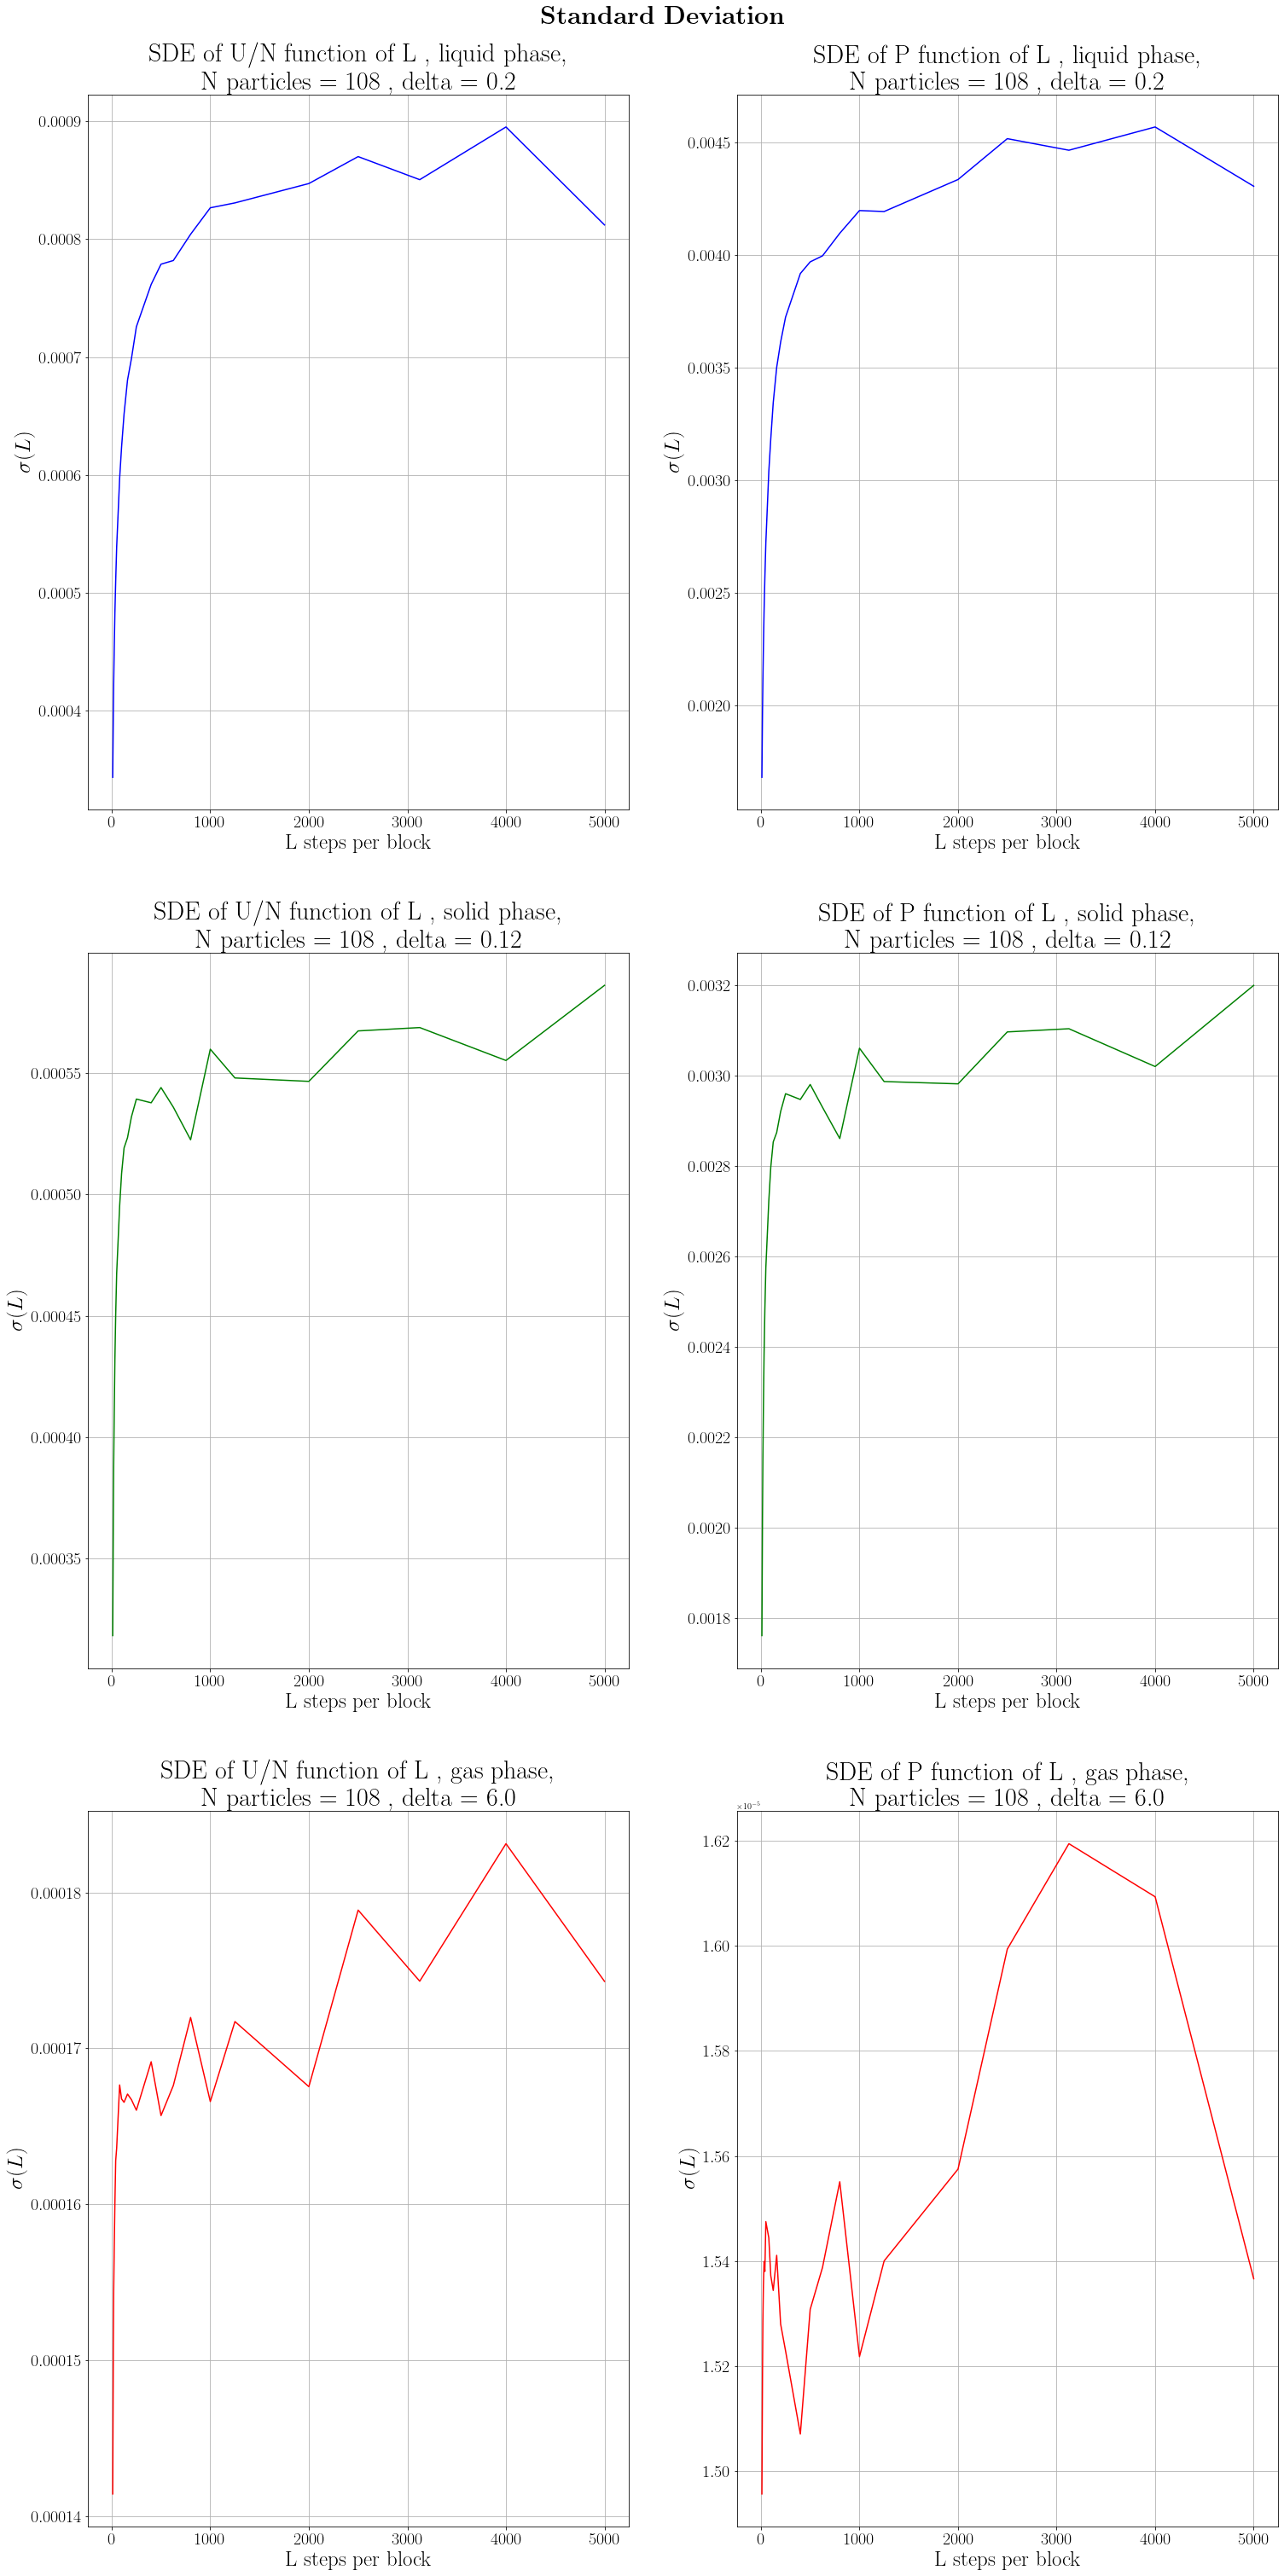

In [15]:
#data set size
Y2_vec= np.empty((len(phase) ,2 ), dtype=object) #value of the observable per block
sigma= np.empty((len(phase) ,2 ) , dtype=object) #dev std
M=500000 #data set size

L = []
L_min = 10 # minimum size of each block
L_max = 5000 # maximum size of each block
for i in range(L_min, L_max+1):
    if(M%i==0):
        L.append(int(i))
L = np.array(L)
print("Block lenght: ")
print(L)
        
        
#sigma plots
fig, axes = plt.subplots(len(phase), 2 , figsize=(25, 48))
plt.suptitle(r"\textbf{Standard Deviation}", fontsize='30')
fig.subplots_adjust(top=0.95)

for i in range(len(phase)):
    for j in range(2):
        Y2_vec[i][j] = load_ac_data(filename[i][j], None)
        sigma[i][j] = sigma_data_block(Y2_vec[i][j]  , L )
        plot_sigma(axes[i][j] , L , sigma[i][j] , Obs[j] , phase[i] , delta[i] , colors[i])

- Gli andamenti sopra riportati mostrano che il **livello di saturazione** dell'incertezza statistica per il fluido LJ simulato nella tre differenti fasi viene raggiunto dopo alcune migliaia di steps MC. 


- In particolare si osserva che la fase liquida è quella che necessita un numero maggiore di passi per blocco ($L_{liq} \simeq 2000$) afinchè l'errore del calcolo MC non sia sottostimato e i valori medi estratti da ciascun blocco siano statisticamente indipendenti e sufficientemente scorrelati.


- Nella simulazione della fase gassosa invece si osserva un risultato coerente con quello dedotto in precedenza dai grafici dell'autocorrelazione, ossia il moto caotico scorrela rapidamente le configurazioni prodotte dal Metropolis e la lunghezza dei blocchi potrà essere scelta minore. Infatti dopo pochi steps l'errore ha gia raggiunto il suo valore di saturazione e le successive variazioni di SDE sono strettamente dovute al numero di blocchi $N$ variabile.

**N.B.:** il tempo di esecuzione dello script python necessita di qualche secondo. 

### Esercizio 7.03

In questa seconda parte viene inserito nel codice MDNVE_MCNVT l'algoritmo che permette di calcolare la **funzione di distribuzione radiale** $g(r)$ che è una funzione che dipende solo dal **modulo** della distanza relativa a due soli gradi di libertà (questo vale in un **fluido omogeneo**) e per questo motivo è anche detta funzione di distribuzione a coppie. Tale funzione di distribuzione per le posizioni atomiche appartiene all'insieme delle **quantità strutturali** che caratterizzano un fluido monoatomico semplice.

Il significato fisico di questa funzione di distribuzione radiale coincide con la probabilità di trovare una coppia di particelle del sistema ad una distanza $r$ relativamente alla probabilità attesa per una distribuzione completamente casuale, quindi quella di un **gas ideale**, alla stessa densità e distanza. Essa quindi ci fornisce molte informazioni sulla **struttura** atomica del fluido in esame.

Per implementare il calcolo, a livello *pratico*, nel codice viene suddiviso l'intervallo $[0;L/2]$ , con $L$ lato del box della simulazione in cui è racchiuso il sistema, in $n_{bins}$ (forniti da *input.in*), ossia intervallini di larghezza ${bin}_{size} = \frac{L}{2}\frac{1}{n{bins}}$. Ciascun bin corrisponde ad un opportuno intervallo radiale all'interno dei quali cade la distanza che separa due particelle all'interno del box durante la simulazione. All'interno della routine *Measure()*, nel doppio ciclo sopra tutte le coppie possibili di particelle, viene valuatata la distanza $dr$ per ogni coppia di particelle e quando questa rientra in uno degli intervallini il bin corrispondente viene aumentato di due unità come se venisse *riempito* un **istogramma**. Alla fine della simulazione, come mostrato a lezione, i valori ottenuti in ogni bin dell'istogramma vengono normalizzati dividendoli per la costante $Cost=\rho N \Delta V(r)$ con $\Delta V(r) = \frac{4}{3}\pi[(r+dr)^3-r^3]$.

Nel file *(algoritmo)/(phase)/equilibration/
(phase)0_output_gave.dat* vengono salvati i valori medi finali di $g(r)$ con le realtive incertezze statistiche ottenute tenendo conto dei valori progressivi accumulati ad ogni blocco. Nel file *(algoritmo)/(phase)/equilibration/(phase)0_output_gofr.dat* vengono salvati invece i valori medi con gli errori per ciascun blocco per tenere traccia di eventuali errori sistematici che influenzano l'implementazione dell'algoritmo da corregere e per verificare che in media l'andamento sia il medesimo.

Gli andamenti della funzione di di distribuzione radiale in funzione della distanza radiale tra le particelle, con $r \in \left[ 0; L/2\right]$, sono riportati qui di seguito per tutte e tre le condizioni termodinamiche studiate per il sistema modellizzato con potenziale LJ.


**N.B.**: la funzione di distribuzione radiale non è solo utile per appronfondire la struttura del fluido, ma consente di calcolare la **media di ensemble** di qualsiasi **funzione a coppia delle coordinate**, come l'energia potenziale del sistema.
Tramite tali espressioni vengono quindi calvolate le **correzioni di coda** sopracitate, ossia i contributi a lungo raggio trascurati in una simulazione che calcola un potenziale con un **cutoff sferico** a distanza $r_c$, supponendo generalmente la $g(r)=1$ per raggi superiori a quello di cutoff. 

### Esercizio 7.04

Nell'ultima parte di questa esercitazione si esegue l'effettiva simulazione MC e MD dell'**Argon** secondo il modello del sistema LJ nell'ensemble canonico NVT e microcanonico MD, scegliendo come configurazioni iniziali quelle salvate dopo aver equilibrato il sistema, nelle tre condizioni termodinamiche riportate nella prima sezione di questa analisi. 

In seguito alle considerazioni espresse nel paragrafo *Esercizio 7.01* si è scelto di effettuare la simulazione con un numero di blocchi pari a $N_{solido}=N_{liquido}=N_{gas}=100$ e un numero di step MC per blocco pari a $L_{solido}=L_{liquido}=L_{gas}=2000$ (per quanto detto nelle sezioni precedenti, in modo da essere conservativi).

Qui di seguito sono riportati i grafici che mostrano i valori medi ottenuti con le relative incertezze statistiche, con il *blocking method*, (per tutte le fasi) dell'energia potenziale per particella $\frac{U}{N}$ e pressione $P$ in funzione del numero di blocchi in cui è suddivisa la simulazione. Sono riportati plots che confrontano i risultati ottenuti per le tre variabili rispettivamente nelle simulazioni MC e nelle simulazioni di dinamica molecolare, in modo che la temperatura $T$ a cui avviene la prima simulazione coincida, per le tre fasi termodinamiche, con quella media usata per la simulazione in NVE.

Per effettuare queste misure è stato implementato nel codice una funzione *Equilibration()*. Questa permette nel caso di *iEQ=1*, ossia nel caso di misura "reale", di implementare l'equilibrazione del sistema in modo completamente automatico, in modo tale da non doverla svolgere manualmente ogni volta. La routine in questione si attiva però solo nel caso in cui *non* venga richiesto al codice di ripartire dall'ultima configurazione generata (ossia *restart=0*).

**N.B.** Nel caso dell'algoritmo di MD la funzione *Equilibration()* è calibrata sui parametri richiesti dall'esercizio. Per un utilizzo più generico andrebbe opportunamente modificata.




In [16]:
####FUNCTIONS
def load_g_data(Y_file) : 
    X, Y, Y_err = np.loadtxt(Y_file, usecols = (0,1,2) ,unpack=True)
    return X, Y, Y_err

def plot_g_gdata(ax, x, y, err , phase , method) :
    ax.errorbar(x, y, yerr=err, label=f"{method}")
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.set_xlabel('r' , fontsize=25)
    ax.set_ylabel(f"g(r)" , fontsize=25)
    ax.set_title(f"Radial distribution ,{phase} phase,\n N particles = {Npart}", fontsize=30)
    ax.legend(prop={'size': 25})
    ax.grid(True)
    
def load_Y_data(Y_file) : 
    X, Y, Y_err = np.loadtxt(Y_file, usecols = (0,2,3) ,unpack=True)
    return X, Y, Y_err

def plot_Y_data(ax, x, y, err, observable , phase , method) :
    ax.errorbar(x, y, yerr=err, label=f"{method}")
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.set_xlabel('i block step' , fontsize=25)
    ax.set_ylabel(f"{observable}" , fontsize=25)
    ax.set_title(f"{phase} phase, N particles = {Npart}", fontsize=30)
    ax.legend(prop={'size': 25})
    ax.grid(True)


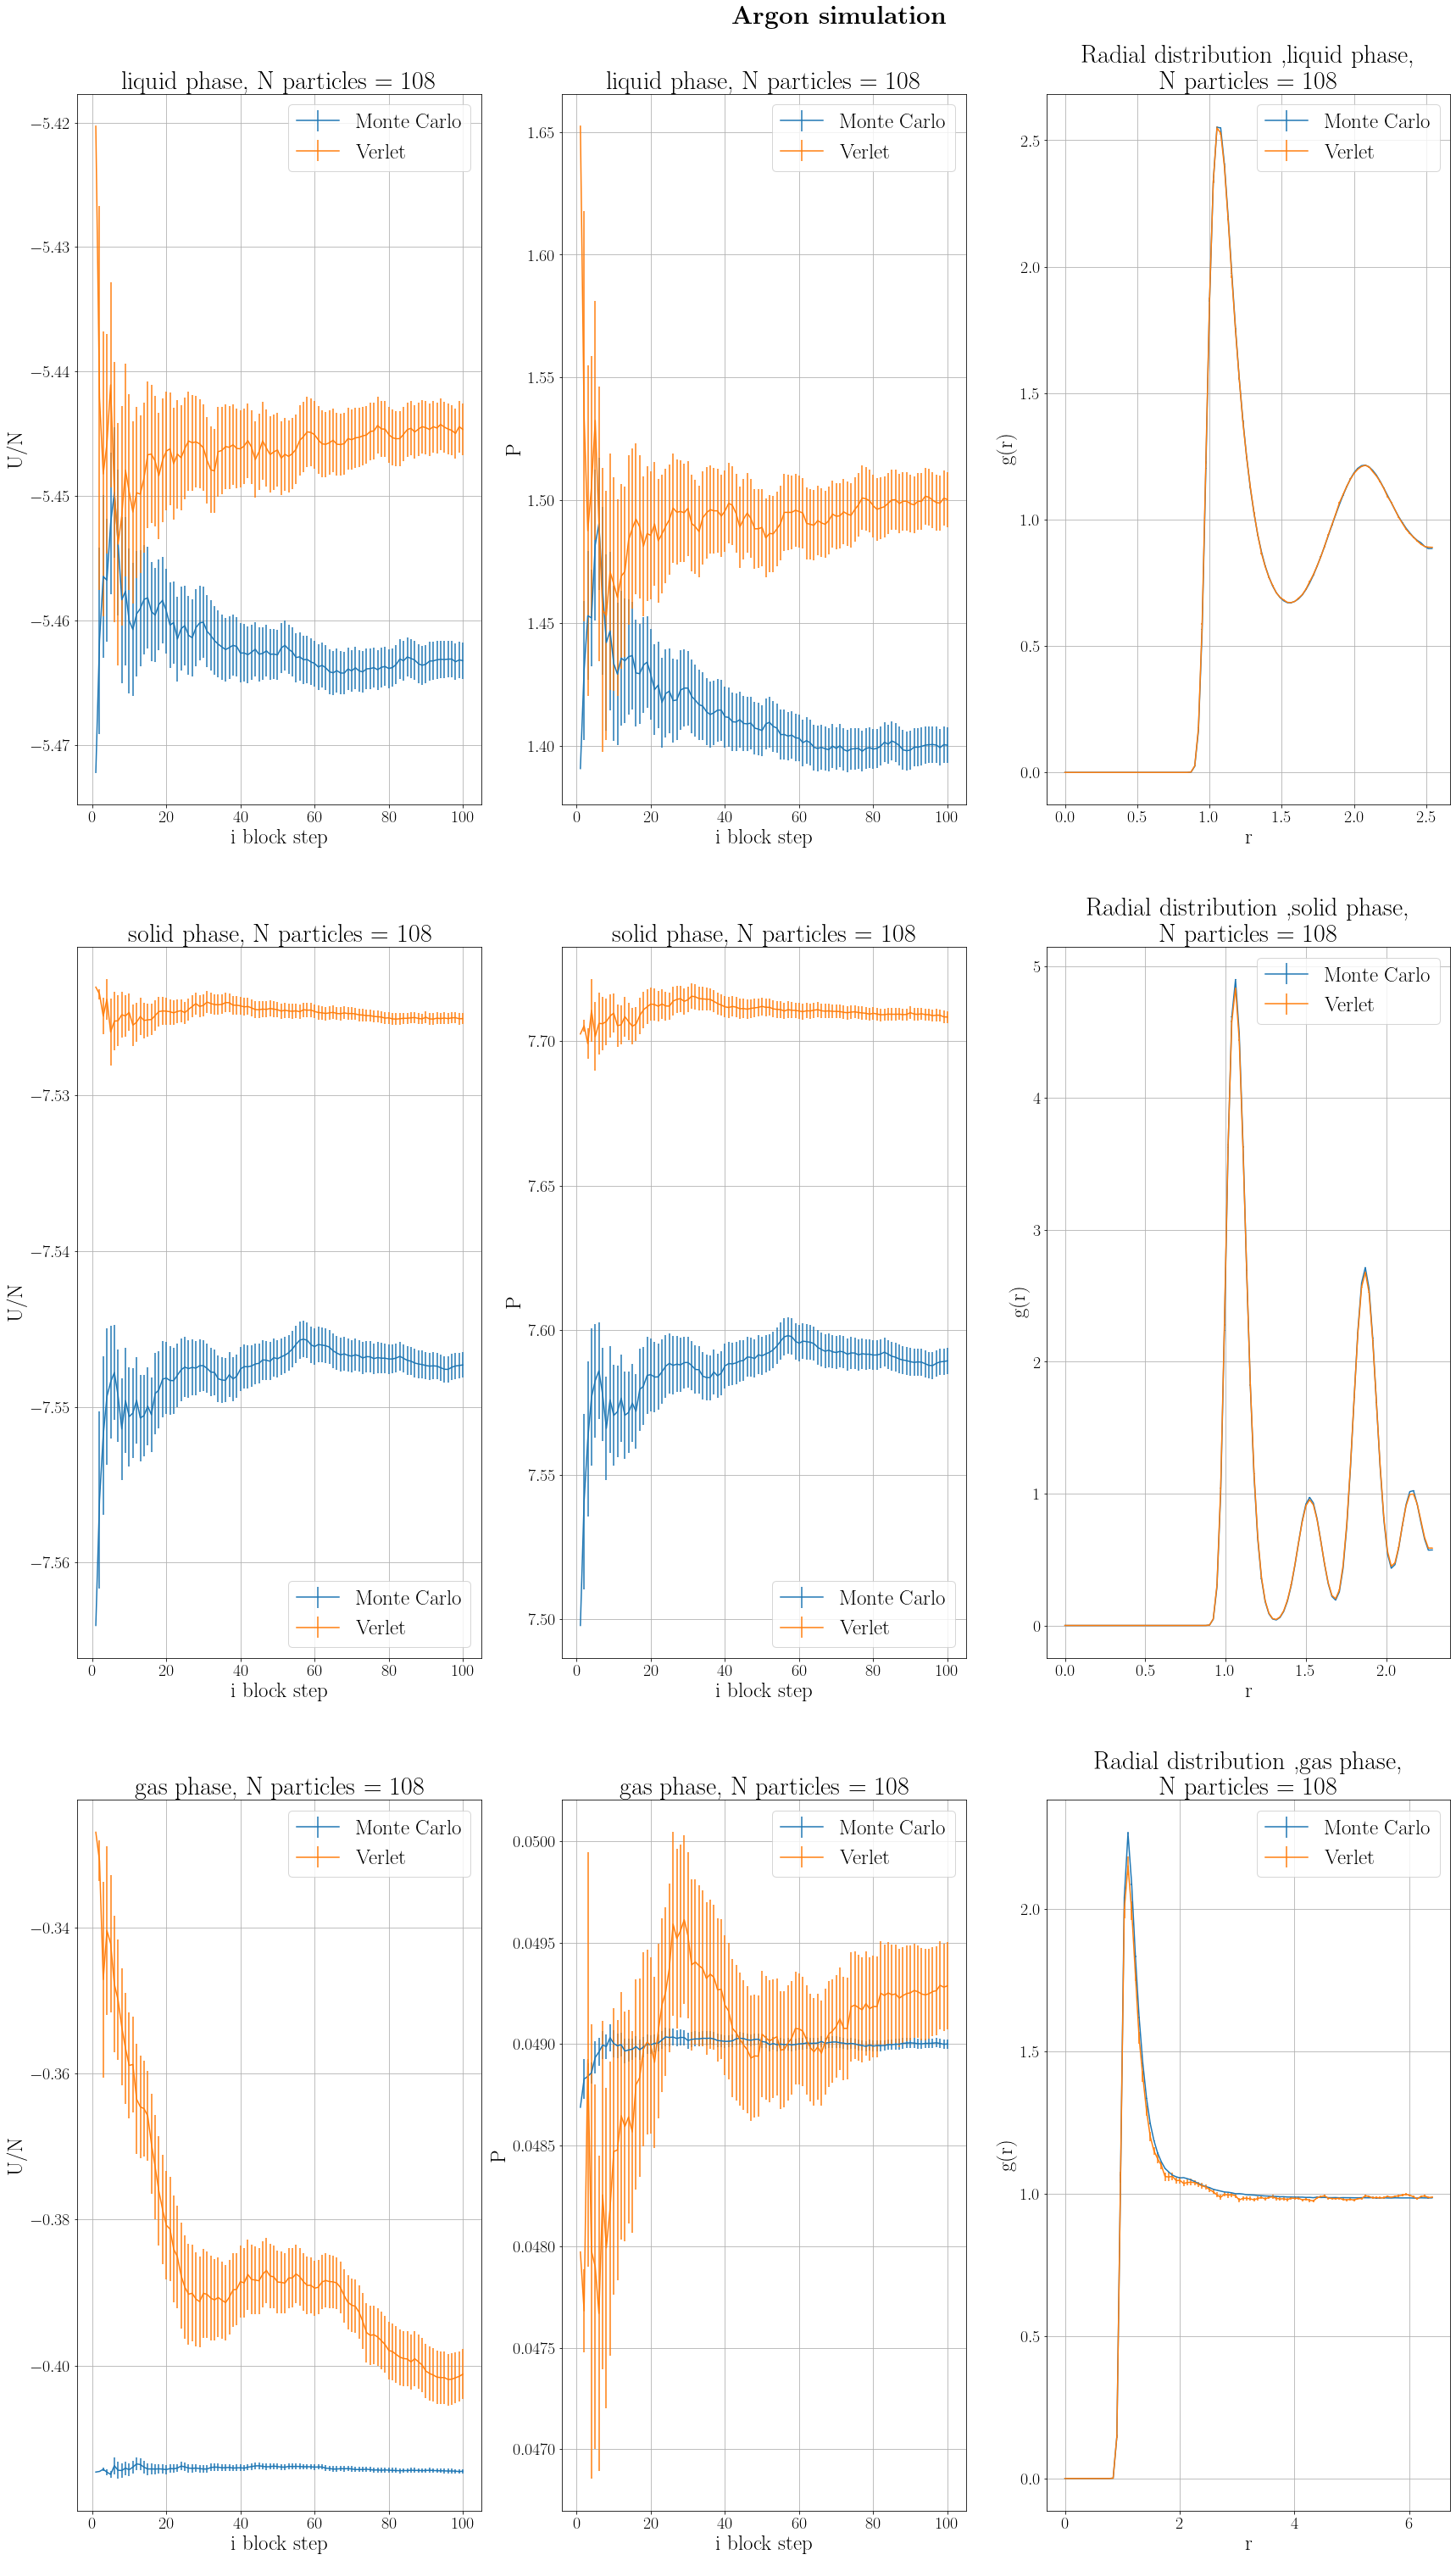

In [20]:
#data set size
Y3_vec= np.empty((len(phase) ,len(Obs) ), dtype=object) 
Y4_vec= np.empty((len(phase) ,len(Obs) ), dtype=object) 
Y3_err_vec= np.empty((len(phase) ,len(Obs) ), dtype=object) 
Y4_err_vec= np.empty((len(phase) ,len(Obs) ), dtype=object)
X_vec= np.empty((len(phase) ,len(Obs) ), dtype=object)

filename1 = np.empty((len(phase) ,len(Obs)), dtype = object)   
filename2 = np.empty((len(phase) ,len(Obs)), dtype = object)   

#sigma plots
fig, axes = plt.subplots(len(phase), len(Obs) , figsize=(25, 48))
plt.suptitle(r"\textbf{Argon simulation}", fontsize='30')
fig.subplots_adjust(top=0.95, left=0.0)

for i in range(len(phase)):
    for j in range(len(Obs)):
        filename1[i][j] = path[0] + phase[i] + "/averages/" + phase[i]+ "0" + names[j]
        filename2[i][j] = path[1] + phase[i] + "/averages/" + phase[i]+ "0" + names[j]
        if(j==2):
            X_vec[i][j] , Y3_vec[i][j] , Y3_err_vec[i][j] = load_g_data(filename1[i][j])
            X_vec[i][j] ,Y4_vec[i][j] ,  Y4_err_vec[i][j] = load_g_data(filename2[i][j]) 
            plot_g_gdata(axes[i][j] , X_vec[i][j] , Y3_vec[i][j] , Y3_err_vec[i][j] , phase[i] , "Monte Carlo")
            plot_g_gdata(axes[i][j] , X_vec[i][j] , Y4_vec[i][j], Y4_err_vec[i][j] , phase[i] , "Verlet")
        else:
            X_vec[i][j] , Y3_vec[i][j] , Y3_err_vec[i][j] = load_Y_data(filename1[i][j])
            X_vec[i][j] ,Y4_vec[i][j] ,  Y4_err_vec[i][j] = load_Y_data(filename2[i][j]) 
            plot_Y_data(axes[i][j] , X_vec[i][j] , Y3_vec[i][j], Y3_err_vec[i][j] , Obs[j], phase[i], "Monte Carlo")
            plot_Y_data(axes[i][j] , X_vec[i][j] , Y4_vec[i][j], Y4_err_vec[i][j] , Obs[j], phase[i] ,"Verlet")

- Nelle prime due colonne i grafici illustrano tipici (vedi esercitazioni precedenti) andamenti di grandezze termodinamiche in funzione del numero di blocchi della simulazione. Si noti che le forme funzionali di $P$ e $U/N$ sono le medesime dato il modo in cui sono calcolate l'energia potenziale e la pressione (a partire dallla grandezza del viriale). Risulta evidente come i risultati delle due simulazioni (MC e MD) **non siano compatibili** per le due osservabili misurate, anche se la scala delle misure risulta simile. Come spiegato in *Ex 4* questo può essere dovuto al fatto che la temperatura di equilibrio a cui opera l'algoritmo di Verlet non vada esattamente a coincidere con quella a cui lavora l'algoritmo di Metropolis, essendo frutto della ricerca "*ad occhio* " dello sperimentatore della temperatura corretta. Tramite una fase di equilibrazione più adeguata questo problema potrebbe essere in parte risolto.


- Nell'ultima colonna si nota l'evidente **compatibilità** delle funzioni di distribuzione radiale $g(r)$, calcolate simulando l'Argon secondo il modello Lennard-Jones, in condizioni termodinamiche simili (stessa temperatura), rispettivamente nell'ensemble microcanonico NVE con la dinamica molecolare risolvendo le equazioni del moto e nell'ensemble canonico NVT con una simulazione MC campionando il peso di Boltzmann con l'algoritmo di Metropolis. La sostanziale **equivalenza delle proprietà strutturali** studiate suggerisce come metodi molto diversi tra loro alla fine producono configurazioni che, in relazione a correlazioni spaziali, risultano quasi indistinguibili. Da una parte questo conferma l'equivalenza nella scelta degli Ensemble, nell'ambito della meccanica statistica, per studiare le proprietà termodinamiche di specifici sistemi e dall'altra come metodi di campionamento tanto diversi alla fine portino agli stessi risultati.


- I risultati trovati sull'andamento della $g(r)$ sono ragionevoli: si noti che le particelle hanno una probabilità nulla di trovarsi a distanze ravvicinate a causa del termine di **core** del potenziale LJ che impedisce alle particelle di sovrapporsi. A distanze maggiori invece tale probabilità oscilla intorno al valore 1 , come se le particelle si disponessero in **shell** concetriche attorno ad una particella che si trova nell'origine del sistema di riferimento considerato. Le oscillazioni nella fase solida sono le maggiori ed indicano la presenza dei primi vicini nella struttura cristallina reticolare. 


- Si osservi che più la fase simulata è simile a quella di un gas ideale, più il valore della funzione di distribuzione radiale tende ad assumere il valore 1, in perfetta coerenza con il significato fisico di questa funzione. In particolare per la fase gassosa dell'Argon, a grandi distanze , la differenza fra essa e un gas ideale risulta praticamente annullata.
